                 Borough      2018
17              Hounslow  0.251483
26  Richmond upon Thames  0.249678
14                Harrow  0.246354
4                Bromley  0.244213
28                Sutton  0.242806
12  Hammersmith & Fulham  0.241674
16            Hillingdon  0.238080
7                Croydon  0.238033
2                 Bexley  0.235351
9                Enfield  0.234551
20  Kingston upon Thames  0.234162
8                 Ealing  0.231940
15              Havering  0.231202
1                 Barnet  0.229453
25             Redbridge  0.223655


/var/folders/ch/z3tjjpcx2sq4hkqt1krsn0500000gn/T/ipykernel_77809/3330995870.py:64: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y1998 = float(d['Average_price'][d['Year']==1998])
/var/folders/ch/z3tjjpcx2sq4hkqt1krsn0500000gn/T/ipykernel_77809/3330995870.py:65: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y2018 = float(d['Average_price'][d['Year']==2018])


[Text(0, 0, 'Hounslow'),
 Text(1, 0, 'Richmond upon Thames'),
 Text(2, 0, 'Harrow'),
 Text(3, 0, 'Bromley'),
 Text(4, 0, 'Sutton'),
 Text(5, 0, 'Hammersmith & Fulham'),
 Text(6, 0, 'Hillingdon'),
 Text(7, 0, 'Croydon'),
 Text(8, 0, 'Bexley'),
 Text(9, 0, 'Enfield'),
 Text(10, 0, 'Kingston upon Thames'),
 Text(11, 0, 'Ealing'),
 Text(12, 0, 'Havering'),
 Text(13, 0, 'Barnet'),
 Text(14, 0, 'Redbridge')]

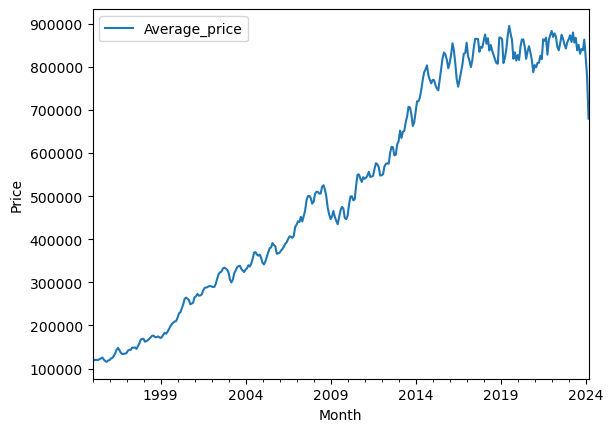

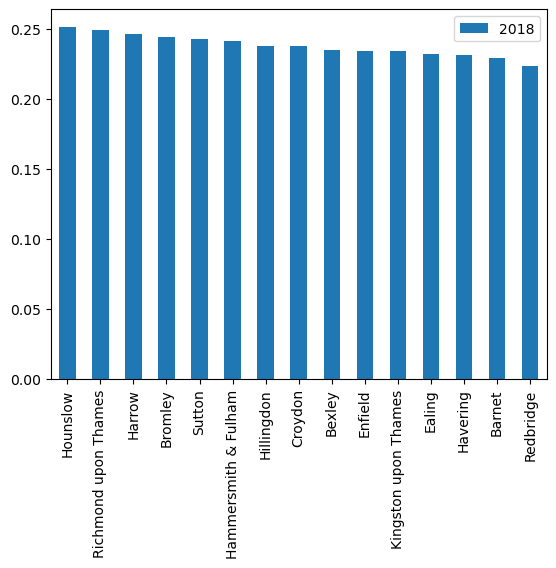

In [33]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
pd.options.mode.copy_on_write = True

#Import data from excel into a DataFrame
url_LondonHousePrices = url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

#Transpose data
prop_df = properties.transpose()

#Reset Index
prop_df = prop_df.reset_index()

#Clean up first row of dates into column names
prop_df.columns = prop_df.iloc[0]
prop_df = prop_df.drop([0])

#Rename columns
prop_df = prop_df.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

#Reshape data and rename
prop_df = pd.melt(prop_df, id_vars= ['London_Borough', 'ID'])
clean_prop = prop_df.rename(columns = {0: 'Month', 'value': 'Average_price'})

#Convert data to manageable forms, numerical and datetime
clean_prop['Average_price'] = pd.to_numeric(clean_prop['Average_price'])

#All values for unnamed districts are not available
drop_prop = clean_prop.dropna()

# A list of non-boroughs. 
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

#Separate out non-Boroughs from the data
drop_prop[drop_prop.London_Borough.isin(nonBoroughs)]
drop_prop[~drop_prop.London_Borough.isin(nonBoroughs)]
df=drop_prop[~drop_prop.London_Borough.isin(nonBoroughs)]

#Vistualizing Camden
camden_prices = df[df['London_Borough'] == 'Camden']
ax = camden_prices.plot(kind ='line', x = 'Month', y='Average_price')
ax.set_ylabel('Price')

#Separating months and years
df['Year'] = df['Month'].apply(lambda t: t.year)

#Reset each year and borough as indices for the mean of the average price
dfg = df.groupby(['London_Borough', 'Year']).agg({'Average_price': 'mean'})
dfg.sample(10)
dfg = dfg.reset_index()

###Modeling
#Creating a filter and comparing years  [[[could be done with pivot table]]] *research addtl adv formula and loops

def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y1998/y2018]
    return ratio

#Create iterator loop
final = {}
# Call the iterator variable 'b'. 
for b in dfg['London_Borough'].unique():
    # Let's make our parameter to our create_price_ratio function: i.e., we subset dfg on 'London_Borough' == b. 
    borough = dfg[dfg['London_Borough'] == b]
    # Make a new entry in the final dictionary whose value's the result of calling create_price_ratio with the argument: borough
    final[b] = create_price_ratio(borough)

df_ratios = pd.DataFrame(final)

#transpose
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)

top15 = df_ratios.sort_values(by='2018',ascending=False).head(15)
print(top15)

ax = top15[['Borough','2018']].plot(kind='bar')

ax.set_xticklabels(top15.Borough)

In [ ]:


clean_prop['Month'] = pd.to_datetime(clean_prop['Month'])
df['Year'] = df['Month'].dt.year